In [1]:
import sys
import numpy as np
import lal
import lalsimulation as lalsim
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

rcParams['figure.figsize'] = (8, 6)
rcParams['font.size'] = 14
import seaborn as sns
from scipy.interpolate import interp1d
sns.set_context('talk')
from pycbc.conversions import f_schwarzchild_isco, mchirp_from_mass1_mass2, lambda_tilde, mass2_from_mchirp_mass1
from pycbc.conversions import mchirp_from_mass1_mass2
from pycbc.conversions import mass1_from_mchirp_q,mass2_from_mchirp_q

In [2]:
radius=10
mass=np.linspace(1.38,1.8,100)
compactness=np.zeros(100)
for i in range(0,100):
    compactness[i]=lal.G_SI*lal.MSUN_SI*mass[i]/(radius*(10**3)*(lal.C_SI**2))
    
mchirp=np.full(100,1.188)
mass2=mass2_from_mchirp_mass1(mchirp,mass)

q=np.zeros(100)
for i in range(0,100):
    q[i]=mass2[i]/mass[i]
    
lmd_tilde=np.zeros(100)
c=(16.0/13.0)*(15-np.pi**2)/(3*np.pi**2)
for i in range(0,100):
    lmd_tilde[i]=c*compactness[i]**(-5)
    lmd_tilde[i]*=((1+12*q[i])*(1-2*compactness[i])**2.5+(1+12/q[i])*(1-2*q[i]*compactness[i])**2.5)/((1+q[i])**5)    
    

In [3]:
radius12=12
mass=np.linspace(1.38,1.8,100)
compactness12=np.zeros(100)
for i in range(0,100):
    compactness12[i]=lal.G_SI*lal.MSUN_SI*mass[i]/(radius12*(10**3)*(lal.C_SI**2))
    
mchirp=np.full(100,1.188)
mass2=mass2_from_mchirp_mass1(mchirp,mass)

q=np.zeros(100)
for i in range(0,100):
    q[i]=mass2[i]/mass[i]
    
lmd_tilde12=np.zeros(100)
c=(16.0/13.0)*(15-np.pi**2)/(3*np.pi**2)
for i in range(0,100):
    lmd_tilde12[i]=c*compactness12[i]**(-5)
    lmd_tilde12[i]*=((1+12*q[i])*(1-2*compactness12[i])**2.5+(1+12/q[i])*(1-2*q[i]*compactness12[i])**2.5)/((1+q[i])**5)
    
    
    

In [4]:
radius11=11
mass=np.linspace(1.38,1.8,100)
compactness11=np.zeros(100)
for i in range(0,100):
    compactness11[i]=lal.G_SI*lal.MSUN_SI*mass[i]/(radius11*(10**3)*(lal.C_SI**2))
    
mchirp=np.full(100,1.188)
mass2=mass2_from_mchirp_mass1(mchirp,mass)

q=np.zeros(100)
for i in range(0,100):
    q[i]=mass2[i]/mass[i]
    
lmd_tilde11=np.zeros(100)
c=(16.0/13.0)*(15-np.pi**2)/(3*np.pi**2)
for i in range(0,100):
    lmd_tilde11[i]=c*compactness11[i]**(-5)
    lmd_tilde11[i]*=((1+12*q[i])*(1-2*compactness11[i])**2.5+(1+12/q[i])*(1-2*q[i]*compactness11[i])**2.5)/((1+q[i])**5)

## Effective Tidal Deformability as a function of primary mass

For a fixed chirp mass of $\mathcal{M}_c = 1.188 M_{\odot}$, the effective tidal deformability parameter is plotted as a function of the primary mass, for fixed radii $R=10,11,12 \;\; km$. It is seen that $\tilde{\Lambda}$ depends very weakly on the primary mass, but strongly on the radius of the neutron star.

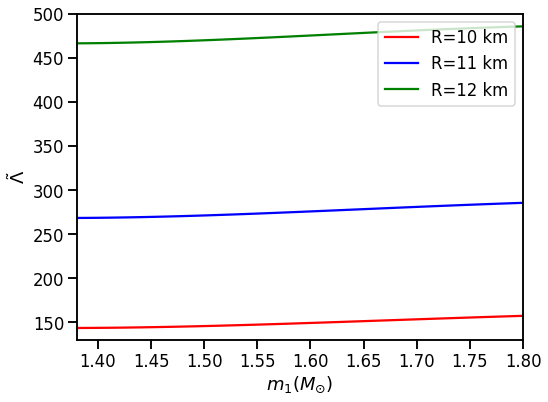

In [5]:
plt.plot(mass,lmd_tilde,label="R=10 km",color='red') 
plt.plot(mass,lmd_tilde11,label="R=11 km",color='blue')
plt.plot(mass,lmd_tilde12,label="R=12 km",color='green')
plt.xlabel(r'$m_1 (M_{\odot})$')
plt.ylabel(r'$\tilde{\Lambda}$')
plt.xlim(1.38,1.8)
plt.ylim(130,500)
plt.legend(loc="upper right")
plt.show()
                                                                                  

## Quasi-Universal Relation between $\tilde{\Lambda}$ and the NS radius

In [6]:
m_bsk,r_bsk,l_bsk,_=np.loadtxt('/home/abandopa/projects/low_mass_ns_search/banksims/BSk21_F.dat',unpack=True)
td=interp1d(m_bsk,l_bsk,kind='cubic')
r=interp1d(m_bsk,r_bsk,kind='cubic')
lmd1_136,lmd2_136=td(1.36),td(1.36)
ltilde_136=lambda_tilde(1.36,1.36,lmd1_136,lmd2_136)
radius_136=r(1.36)
print(ltilde_136)
lmd1_140,lmd2_140=td(1.40),td(1.33)
radius_140=r(1.4)
ltilde_140=lambda_tilde(1.40,1.33,lmd1_140,lmd2_140)
print(ltilde_136,ltilde_140)
lmd1_150,lmd2_150=td(1.50),td(1.24)
radius_150=r(1.5)
ltilde_150=lambda_tilde(1.50,1.24,lmd1_150,lmd2_150)
print(ltilde_136,ltilde_140,ltilde_150)

611.3525555934351
611.3525555934351 599.3229873713747
611.3525555934351 599.3229873713747 598.9046053037889


In [7]:
m_sly,r_sly,l_sly=np.loadtxt('SLY-EOS.txt',unpack=True)
td=interp1d(m_sly,l_sly,kind='cubic')
r=interp1d(m_sly,r_sly,kind='cubic')
lmdsly1_136,lmdsly2_136=td(1.36),td(1.36)
ltildesly_136=lambda_tilde(1.36,1.36,lmdsly1_136,lmdsly2_136)
radiussly_136=r(1.36)
print(ltildesly_136)
lmd1sly_140,lmd2sly_140=td(1.40),td(1.33)
radiussly_140=r(1.4)
ltildesly_140=lambda_tilde(1.40,1.33,lmd1sly_140,lmd2sly_140)
print(ltildesly_136,ltildesly_140)
lmd1sly_150,lmd2sly_150=td(1.50),td(1.24)
radiussly_150=r(1.5)
ltildesly_150=lambda_tilde(1.50,1.24,lmd1sly_150,lmd2sly_150)
print(ltildesly_136,ltildesly_140,ltildesly_150)

379.76098356991236
379.76098356991236 371.7171863496962
379.76098356991236 371.7171863496962 375.5786203884965


In [8]:
m_ms1,r_ms1,l_ms1=np.loadtxt('MS1-EOS.txt',unpack=True)
td=interp1d(m_ms1,l_ms1,kind='cubic')
r=interp1d(m_ms1,r_ms1,kind='cubic')
lmdms11_136,lmdms12_136=td(1.36),td(1.36)
ltildems1_136=lambda_tilde(1.36,1.36,lmdms11_136,lmdms12_136)
radiusms1_136=r(1.36)
print(ltildems1_136)
lmd1ms1_140,lmd2ms1_140=td(1.40),td(1.33)
radiusms1_140=r(1.4)
ltildems1_140=lambda_tilde(1.40,1.33,lmd1ms1_140,lmd2ms1_140)
print(ltildems1_136,ltildems1_140)
lmd1ms1_150,lmd2ms1_150=td(1.50),td(1.24)
radiusms1_150=r(1.5)
ltildems1_150=lambda_tilde(1.50,1.24,lmd1ms1_150,lmd2ms1_150)
print(ltildems1_136,ltildems1_140,ltildems1_150)

1909.107174102628
1909.107174102628 1873.122296501898
1909.107174102628 1873.122296501898 1869.4603432308684


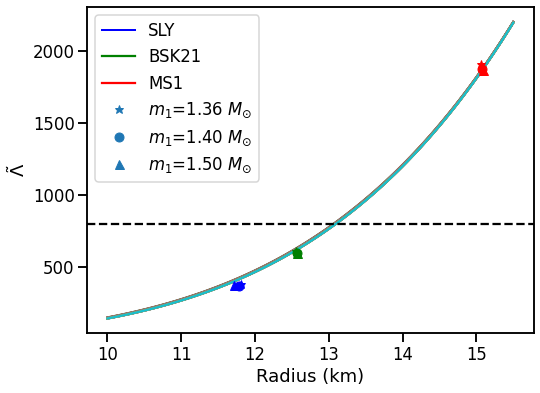

In [9]:
rad=np.linspace(10,15.5,100)
q=np.linspace(0.7,1,20)
mchirp=np.full(20,1.188)
m1=mass1_from_mchirp_q(mchirp, q)
m2=mass2_from_mchirp_q(mchirp, q)

legend_elements = [Line2D([0], [0], color='b', lw=2, label='SLY'),
                   Line2D([0], [0], color='g', label='BSK21'),
                   Line2D([0], [0], color='r', label='MS1'),
                   Line2D([0], [0], marker='*', lw=0, label='$m_1$=1.36 $M_{\odot}$'),
                   Line2D([0], [0], marker='o' ,lw=0,label='$m_1$=1.40 $M_{\odot}$'),
                   Line2D([0], [0], marker='^' ,lw=0,label='$m_1$=1.50 $M_{\odot}$')]     
                   

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='upper left')


for i in range(0,20):
    lmd_tilde=np.zeros(100)
    compactness=np.zeros(100)
    for j in range(0,100):
        compactness[j]=lal.G_SI*lal.MSUN_SI*m2[i]/(rad[j]*(10**3)*(lal.C_SI**2))
        lmd_tilde[j]=c*compactness[j]**(-5)
        lmd_tilde[j]*=((1+12*q[i])*(1-2*compactness[j])**2.5+(1+12/q[i])*(1-2*q[i]*compactness[j])**2.5)/((1+q[i])**5)
    plt.plot(rad,lmd_tilde)
    

plt.plot(radius_136,ltilde_136,'*',color='green',label="BSK21")
plt.plot(radius_140,ltilde_140,'o',color='green')
plt.plot(radius_150,ltilde_150,'^',color='green')
plt.plot(radiussly_136,ltildesly_136,'*',color='blue',label="SLY")
plt.plot(radiussly_140,ltildesly_140,'o',color='blue')
plt.plot(radiussly_150,ltildesly_150,'^',color='blue')
plt.plot(radiusms1_136,ltildems1_136,'*',color='red',label="MS1")
plt.plot(radiusms1_140,ltildems1_140,'o',color='red')
plt.plot(radiusms1_150,ltildems1_150,'^',color='red')
plt.xlabel("Radius (km)")
plt.ylabel(r'$\tilde{\Lambda}$')
#plt.legend(loc="upper left")         
plt.axhline(800,ls='--',color='black')
plt.show()